## default parameter XGBoost model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
# === Helper function ===
def run_baseline(train_path, label='SalePrice', name=''):
    print(f"\n=== Running {name} ===")

    # Read data
    df = pd.read_csv(train_path)
    X = df.drop(columns=[label])
    y = df[label]

    # Split dataset (90% train, 10% validation)
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=0.1, random_state=42
    )

    # Build model (default parameters)
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)

    # === Train set prediction ===
    preds_train = model.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
    mae_train = mean_absolute_error(y_train, preds_train)
    mape_train = np.mean(np.abs((y_train - preds_train) / y_train)) * 100

    # === Validation set prediction ===
    preds_valid = model.predict(X_valid)
    rmse_valid = np.sqrt(mean_squared_error(y_valid, preds_valid))
    mae_valid = mean_absolute_error(y_valid, preds_valid)
    mape_valid = np.mean(np.abs((y_valid - preds_valid) / y_valid)) * 100

    # === Print results ===
    print(f"[{name}] Performance Summary:")
    print(f"  ▸ Train RMSE = {rmse_train:.4f} | MAE = {mae_train:.4f} | MAPE = {mape_train:.2f}%")
    print(f"  ▸ Valid RMSE = {rmse_valid:.4f} | MAE = {mae_valid:.4f} | MAPE = {mape_valid:.2f}%")

    # === Visualization ===
    def plot_actual_vs_pred(y_true, y_pred, title):
        sample_idx = np.random.choice(len(y_true), size=min(100, len(y_true)), replace=False)
        plt.figure(figsize=(6, 6))
        plt.scatter(y_true.iloc[sample_idx], y_pred[sample_idx], alpha=0.7, edgecolor='k')
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
        plt.title(title)
        plt.xlabel("Actual SalePrice")
        plt.ylabel("Predicted SalePrice")
        plt.show()

    # Plot training results
    plot_actual_vs_pred(
        y_train, preds_train,
        f"{name} — Train Set\nRMSE={rmse_train:.4f} | MAE={mae_train:.4f} | MAPE={mape_train:.2f}%"
    )

    # Plot validation results
    plot_actual_vs_pred(
        y_valid, preds_valid,
        f"{name} — Validation Set (10%)\nRMSE={rmse_valid:.4f} | MAE={mae_valid:.4f} | MAPE={mape_valid:.2f}%"
    )

    return model, rmse_train, mae_train, mape_train, rmse_valid, mae_valid, mape_valid


=== Running Cleaned_all_features ===
[Cleaned_all_features] Performance Summary:
  ▸ Train RMSE = 1060.0737 | MAE = 733.4173 | MAPE = 0.48%
  ▸ Valid RMSE = 28014.2447 | MAE = 17843.5055 | MAPE = 9.75%


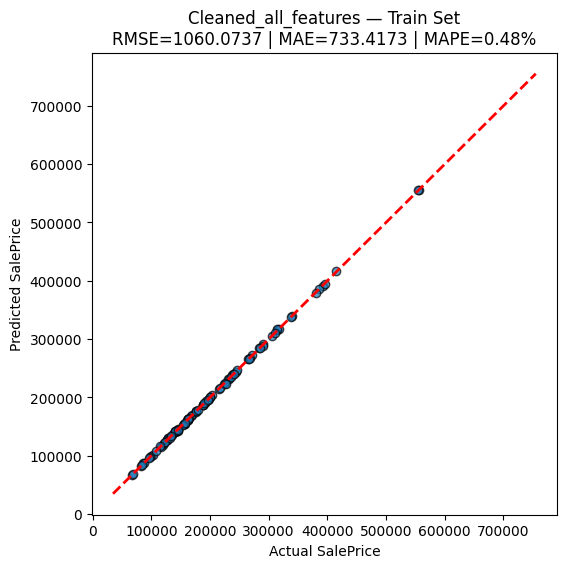

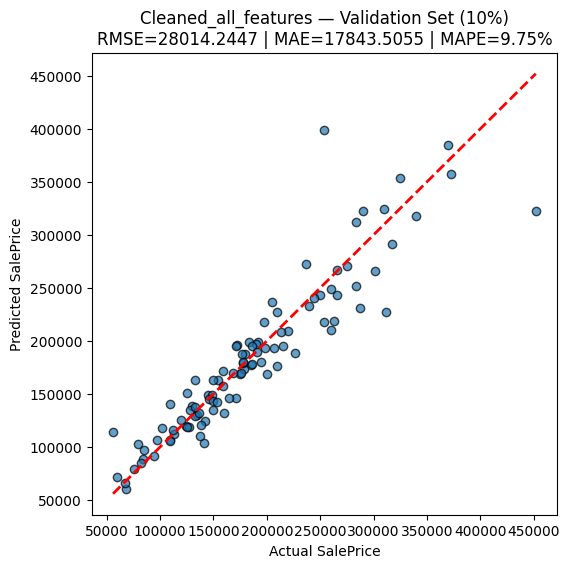

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 1060.0737416650948,
 733.417305312262,
 0.47899160215989023,
 28014.244728073805,
 17843.505511558218,
 9.74540855905398)

In [18]:
# Cleaned version
run_baseline("./data/cleaned/train.csv", name="Cleaned_all_features")


=== Running Method1_Mutual_Info ===
[Method1_Mutual_Info] Performance Summary:
  ▸ Train RMSE = 983.5301 | MAE = 667.3604 | MAPE = 0.44%
  ▸ Valid RMSE = 25946.3152 | MAE = 16567.3409 | MAPE = 9.35%


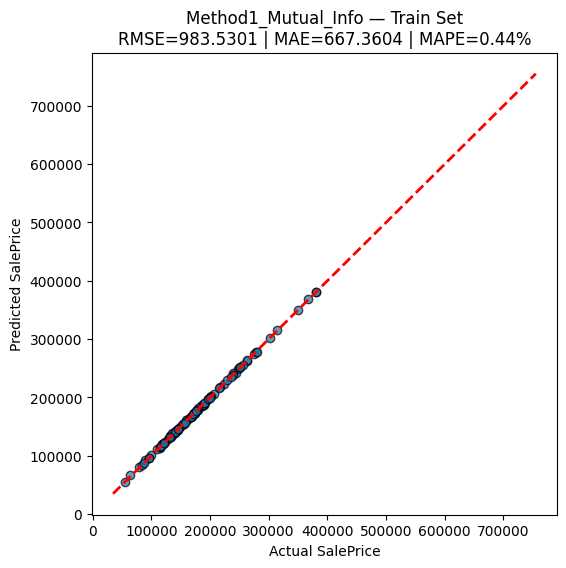

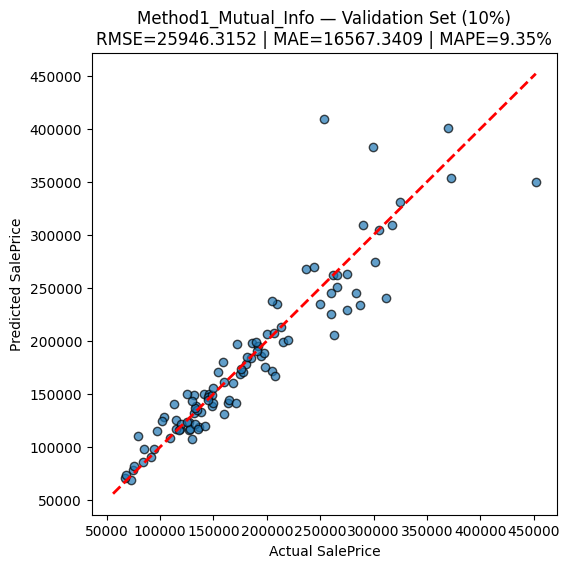

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 983.5301035092443,
 667.3603775942498,
 0.43541965502841806,
 25946.315177274675,
 16567.340860445205,
 9.351590003549488)

In [20]:
# Method 1 (Mutual Information)
run_baseline("./data/Method1,selected/train_filter.csv", name="Method1_Mutual_Info")


=== Running Method2_XGBoost_CV ===
[Method2_XGBoost_CV] Performance Summary:
  ▸ Train RMSE = 1612.4429 | MAE = 1108.1668 | MAPE = 0.75%
  ▸ Valid RMSE = 24594.6613 | MAE = 16772.1933 | MAPE = 10.21%


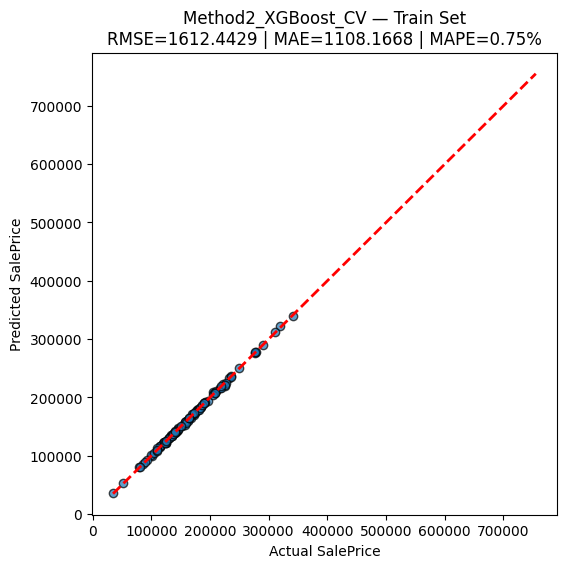

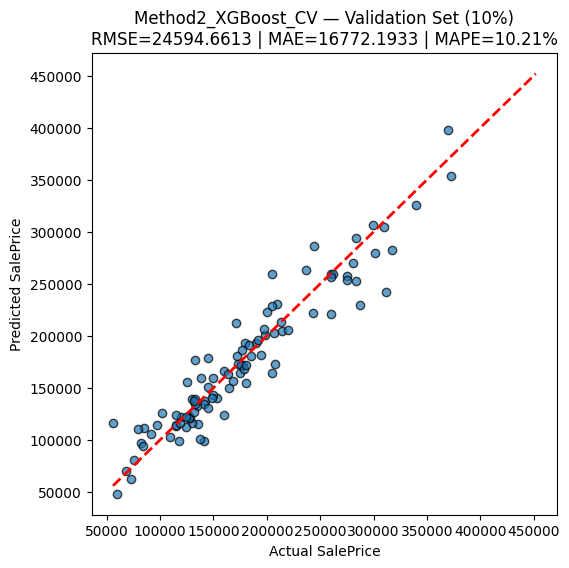

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 1612.4429293274945,
 1108.16681145278,
 0.7494123269982008,
 24594.66130065262,
 16772.193252354453,
 10.206238630696957)

In [21]:
# Method 2 (XGBoost CV)
run_baseline("./data/Method2,selected/train_Method2_selected.csv", name="Method2_XGBoost_CV")

## optimization parameter

### GridSearch one stage version train : test(9:1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
def metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

def plot_actual_vs_pred(y_true, y_pred, title):
    n = min(100, len(y_true))
    idx = np.random.choice(len(y_true), size=n, replace=False)
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true.iloc[idx], y_pred[idx], alpha=0.7, edgecolor='k')
    lo, hi = y_true.min(), y_true.max()
    plt.plot([lo, hi], [lo, hi], 'r--', lw=2)
    plt.title(title)
    plt.xlabel("Actual SalePrice")
    plt.ylabel("Predicted SalePrice")
    plt.show()

def run_grid_search(train_path, label='SalePrice', name=''):
    print(f"\n=== GridSearch on {name} ===")
    df = pd.read_csv(train_path)
    X = df.drop(columns=[label])
    y = df[label]

    # 9:1 hold-out split (for final evaluation only; GridSearchCV will perform 3-fold CV internally)
    X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.1, random_state=42)

    # Base model
    base = XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )

    # Parameter grid (small but effective, designed to prevent overfitting)
    param_grid = {
        'max_depth': [3, 4, 5],
        'learning_rate': [0.05, 0.1],
        'n_estimators': [300, 600, 900],
        'subsample': [0.7, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.9, 1.0],
        'reg_lambda': [0.0, 1.0, 5.0],
        'reg_alpha': [0.0, 0.1, 0.5],
    }

    gs = GridSearchCV(
        estimator=base,
        param_grid=param_grid,
        scoring='neg_root_mean_squared_error',  # higher is better
        cv=3,
        n_jobs=-1,
        verbose=1,
        refit=True  # refit on (X_tr, y_tr) using the best parameters
    )

    gs.fit(X_tr, y_tr)

    print("Best parameters:", gs.best_params_)
    print("Best CV RMSE:", -gs.best_score_)

    best_model = gs.best_estimator_

    # Evaluate on training and validation sets (hold-out)
    pred_tr = best_model.predict(X_tr)
    pred_va = best_model.predict(X_va)

    rmse_tr, mae_tr, mape_tr = metrics(y_tr, pred_tr)
    rmse_va, mae_va, mape_va = metrics(y_va, pred_va)

    print(f"[{name}] Hold-out Performance")
    print(f"  ▸ Train  RMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%")
    print(f"  ▸ Valid  RMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%")

    # Visualization
    plot_actual_vs_pred(
        y_tr, pred_tr,
        f"{name} — Train (best params)\nRMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%"
    )
    plot_actual_vs_pred(
        y_va, pred_va,
        f"{name} — Valid 10% (best params)\nRMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%"
    )

    return best_model, gs.best_params_, {
        "train": (rmse_tr, mae_tr, mape_tr),
        "valid": (rmse_va, mae_va, mape_va)
    }



=== GridSearch on Cleaned_all_features ===
Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
Best params: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'reg_alpha': 0.5, 'reg_lambda': 0.0, 'subsample': 0.9}
Best CV RMSE: 30792.157254833714
[Cleaned_all_features] Hold-out Performance
  ▸ Train  RMSE=4523.6375 | MAE=3540.4072 | MAPE=2.28%
  ▸ Valid  RMSE=22602.9667 | MAE=15175.0697 | MAPE=8.57%


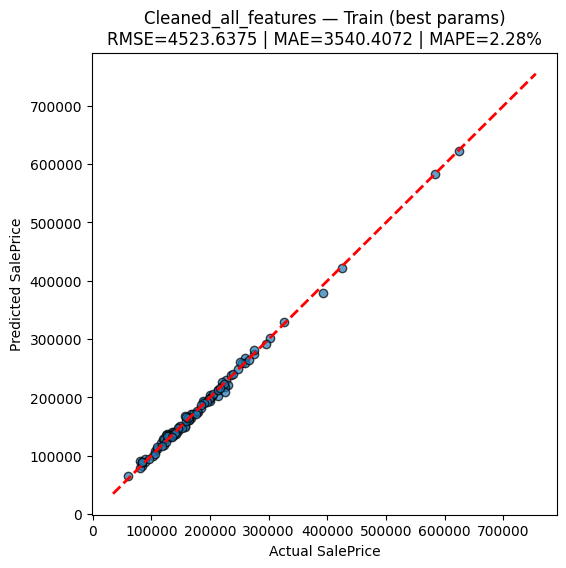

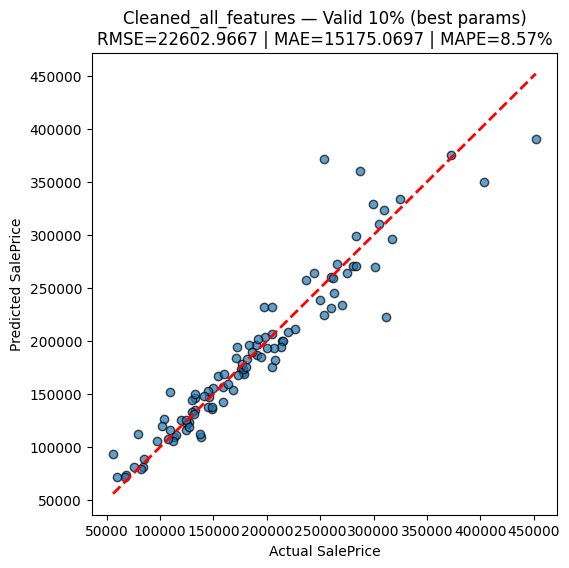

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'colsample_bytree': 0.9,
  'learning_rate': 0.1,
  'max_depth': 4,
  'n_estimators': 300,
  'reg_alpha': 0.5,
  'reg_lambda': 0.0,
  'subsample': 0.9},
 {'train': (4523.637479589395, 3540.40721094345, 2.2824034027137774),
  'valid': (22602.966727055

In [30]:
run_grid_search("./data/cleaned/train.csv", name="Cleaned_all_features")


=== GridSearch on Method1_Mutual_Info ===
Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
Best params: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 900, 'reg_alpha': 0.1, 'reg_lambda': 0.0, 'subsample': 0.9}
Best CV RMSE: 31874.219378643542
[Method1_Mutual_Info] Hold-out Performance
  ▸ Train  RMSE=2839.6250 | MAE=2249.2591 | MAPE=1.47%
  ▸ Valid  RMSE=23103.6802 | MAE=15296.0199 | MAPE=8.51%


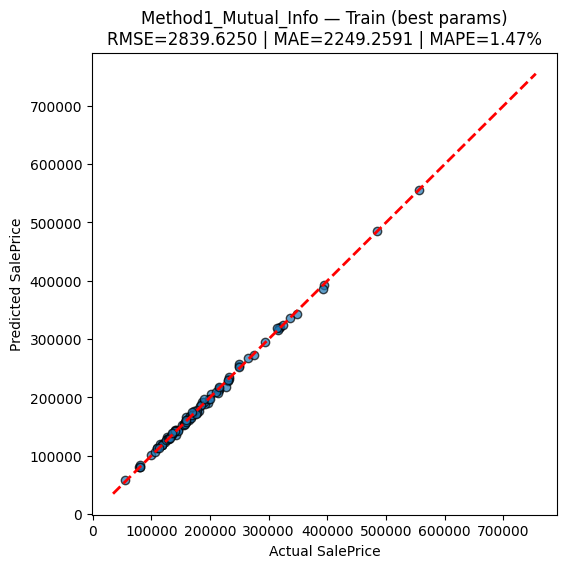

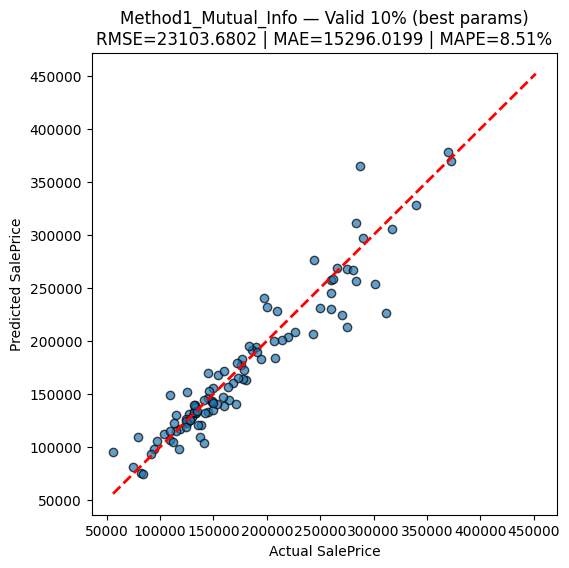

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=900, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'colsample_bytree': 0.9,
  'learning_rate': 0.05,
  'max_depth': 4,
  'n_estimators': 900,
  'reg_alpha': 0.1,
  'reg_lambda': 0.0,
  'subsample': 0.9},
 {'train': (2839.6250030260626, 2249.259109624905, 1.4676113371931727),
  'valid': (23103.68023

In [ ]:
run_grid_search("./data/featured/Method1,selected/train_filter.csv", name="Method1_Mutual_Info")


=== GridSearch on Method2_XGBoost_CV ===
Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
Best params: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 0.5, 'reg_lambda': 5.0, 'subsample': 1.0}
Best CV RMSE: 31182.683765871643
[Method2_XGBoost_CV] Hold-out Performance
  ▸ Train  RMSE=9788.8902 | MAE=6907.2373 | MAPE=4.56%
  ▸ Valid  RMSE=23292.0875 | MAE=16091.6317 | MAPE=9.60%


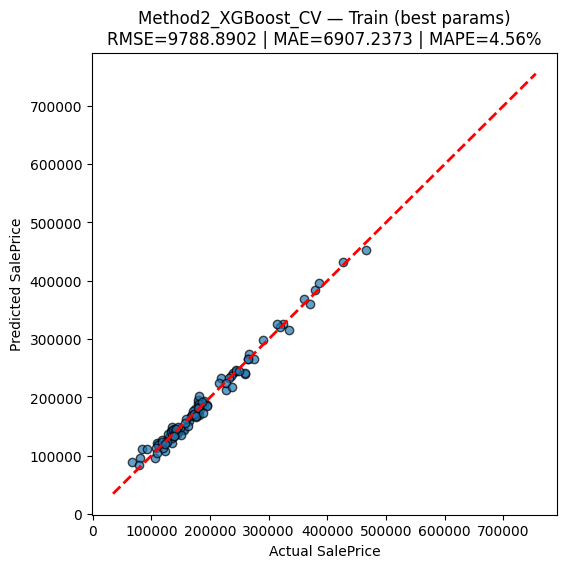

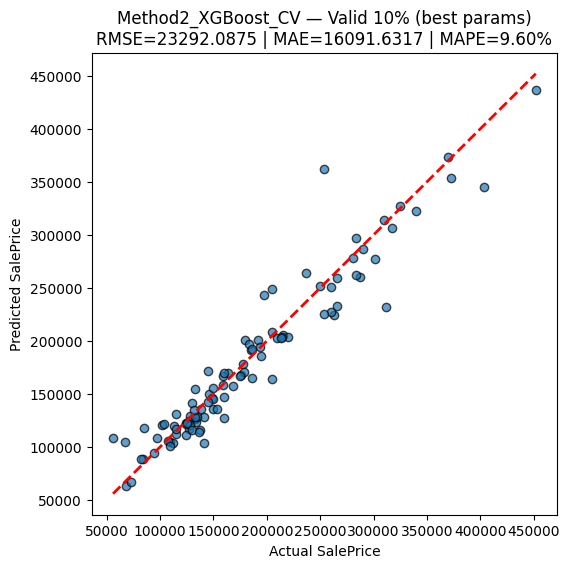

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'colsample_bytree': 0.7,
  'learning_rate': 0.05,
  'max_depth': 5,
  'n_estimators': 300,
  'reg_alpha': 0.5,
  'reg_lambda': 5.0,
  'subsample': 1.0},
 {'train': (9788.890208172685, 6907.2372608054075, 4.557166689843721),
  'valid': (23292.087469

In [ ]:
run_grid_search("./data/featured/Method2,selected/train_Method2_selected.csv", name="Method2_XGBoost_CV")

### more specific GridSearch (log GridSearch + two stage GridSearch version)


###  log + GridSearch

In [ ]:
def _metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

def _plot_loss_from_evals_result(evals_result, best_round=None, title="Training vs Validation RMSE (log target)"):
    try:
        tr = evals_result['validation_0']['rmse']
        va = evals_result['validation_1']['rmse']
    except Exception as e:
        print(f"Warning: cannot parse evals_result_: {e}")
        return
    plt.figure(figsize=(7,5))
    plt.plot(tr, label='Train RMSE (log target)')
    plt.plot(va, label='Valid RMSE (log target)')
    if best_round is not None and 0 <= best_round < len(va):
        plt.axvline(best_round, color='k', linestyle='--', alpha=0.6)
        plt.scatter([best_round], [va[best_round]], s=50, color='red', zorder=3)
        plt.text(best_round, va[best_round], f"  best={best_round}\n  val_rmse={va[best_round]:.4f}",
                 va='bottom', ha='left')
    plt.xlabel('Boosting rounds'); plt.ylabel('RMSE (log space)')
    plt.title(title); plt.grid(alpha=0.3); plt.legend(); plt.show()

def eval_with_log_target(train_path, best_params, label='SalePrice', rs=42,
                         plot_loss=True, early_stopping_rounds=100):
    df = pd.read_csv(train_path)
    X = df.drop(columns=[label])
    y = df[label].astype(float)

    # 7:3 split
    X_tr, X_va, y_tr_raw, y_va_raw = train_test_split(X, y, test_size=0.3, random_state=rs)
    y_tr = np.log1p(y_tr_raw)
    y_va = np.log1p(y_va_raw)

    model = XGBRegressor(objective='reg:squarederror', random_state=rs, n_jobs=-1, **best_params)

    # --- Training (new version preferred; fallback to old version if needed) ---
    used_fallback = False
    try:
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_tr, y_tr), (X_va, y_va)],
            eval_metric='rmse',
            early_stopping_rounds=early_stopping_rounds,
            verbose=False
        )
    except TypeError:
        used_fallback = True
        model.set_params(eval_metric='rmse')  # Old version: use set_params to specify metric
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_tr, y_tr), (X_va, y_va)],
            verbose=False
        )

    # --- Read curves and find best_round (iteration with minimum validation RMSE) ---
    evals_result = model.evals_result()
    val_curve = evals_result['validation_1']['rmse']
    best_round = int(np.argmin(val_curve))  # 0-based index
    best_log_rmse_valid = float(val_curve[best_round])
    best_log_rmse_train = float(evals_result['validation_0']['rmse'][best_round])

    # --- Make predictions at best_round (compatible with different API versions) ---
    def _predict_at_round(m, X, best_round):
        # New version preferred: iteration_range
        try:
            return m.predict(X, iteration_range=(0, best_round + 1))
        except TypeError:
            # Old version: ntree_limit
            return m.predict(X, ntree_limit=best_round + 1)

    pred_tr_best = np.expm1(_predict_at_round(model, X_tr, best_round))
    pred_va_best = np.expm1(_predict_at_round(model, X_va, best_round))

    rmse_tr_b, mae_tr_b, mape_tr_b = _metrics(y_tr_raw, pred_tr_best)
    rmse_va_b, mae_va_b, mape_va_b = _metrics(y_va_raw, pred_va_best)

    print("[LOG target] Hold-out — Metrics at BEST ROUND")
    print(f"  ▸ Best round (0-based) = {best_round}  "
          f"(train_log_rmse={best_log_rmse_train:.4f}, valid_log_rmse={best_log_rmse_valid:.4f})")
    if used_fallback:
        print("  ▸ Note: xgboost old API detected (no eval_metric/early_stopping in fit); used fallback mode.")
    print(f"  ▸ Train RMSE={rmse_tr_b:.4f} | MAE={mae_tr_b:.4f} | MAPE={mape_tr_b:.2f}%")
    print(f"  ▸ Valid RMSE={rmse_va_b:.4f} | MAE={mae_va_b:.4f} | MAPE={mape_va_b:.2f}%")

    if plot_loss:
        _plot_loss_from_evals_result(
            evals_result, best_round=best_round,
            title="XGBoost Training vs Validation RMSE per round (log target)"
        )

    return (model,
            {"best_round": best_round,
             "best_log_rmse": {"train": best_log_rmse_train, "valid": best_log_rmse_valid},
             "orig_metrics_at_best_round": {
                 "train": (rmse_tr_b, mae_tr_b, mape_tr_b),
                 "valid": (rmse_va_b, mae_va_b, mape_va_b)
             }})


[LOG target] Hold-out — Metrics at BEST ROUND
  ▸ Best round (0-based) = 1466  (train_log_rmse=0.0687, valid_log_rmse=0.1288)
  ▸ Note: xgboost old API detected (no eval_metric/early_stopping in fit); used fallback mode.
  ▸ Train RMSE=13905.1798 | MAE=8667.8082 | MAPE=4.85%
  ▸ Valid RMSE=25270.7250 | MAE=15216.3980 | MAPE=9.11%


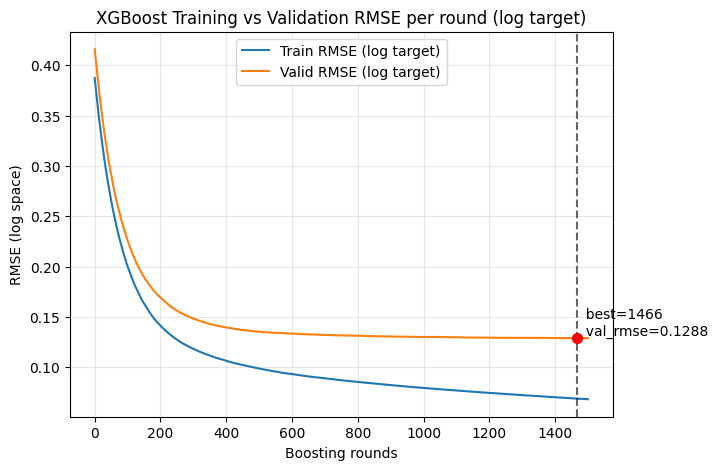

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.013333333333333334,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1500, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'best_round': 1466,
  'best_log_rmse': {'train': 0.06874232793711998,
   'valid': 0.12879451844174722},
  'orig_metrics_at_best_round': {'train': (13905.179837283209,
    8667.808188203966,
    4.8480320439655005),
   'valid': (25270

In [28]:
# cleaned version
best_params_from_linear = {
    'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.013333333333333334, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1500, 'reg_alpha': 0.2, 'reg_lambda': 4.0, 'subsample': 0.6
}
eval_with_log_target("./data/cleaned/train.csv", best_params_from_linear)


[LOG target] Hold-out — Metrics at BEST ROUND
  ▸ Best round (0-based) = 598  (train_log_rmse=0.0740, valid_log_rmse=0.1352)
  ▸ Note: xgboost old API detected (no eval_metric/early_stopping in fit); used fallback mode.
  ▸ Train RMSE=15495.9209 | MAE=9261.6672 | MAPE=5.15%
  ▸ Valid RMSE=28117.4367 | MAE=15716.7790 | MAPE=9.33%


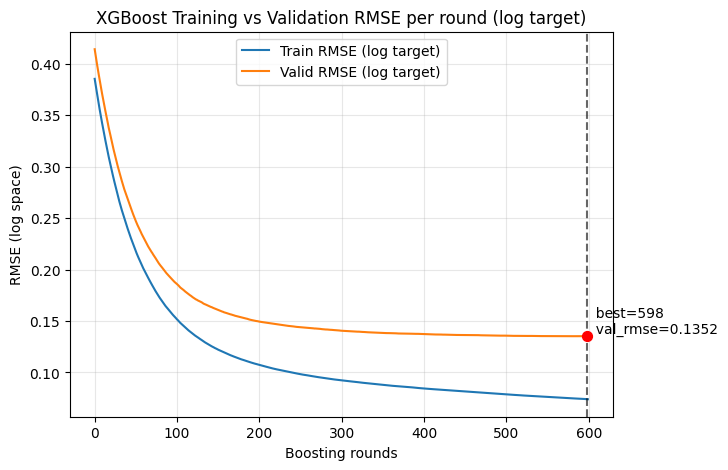

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'best_round': 598,
  'best_log_rmse': {'train': 0.07399152893586362, 'valid': 0.1351613437510111},
  'orig_metrics_at_best_round': {'train': (15495.920944671512,
    9261.667169135651,
    5.150590705724566),
   'valid': (28117.436661576863, 15716.77

In [29]:
# methond 1
best_params_from_linear = {
    'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.02, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 600, 'reg_alpha': 0.39999999999999997, 'reg_lambda': 4.0, 'subsample': 0.6
}
eval_with_log_target("./data/featured/Method1,selected/train_filter.csv", best_params_from_linear)

[LOG target] Hold-out — Metrics at BEST ROUND
  ▸ Best round (0-based) = 1099  (train_log_rmse=0.0960, valid_log_rmse=0.1355)
  ▸ Note: xgboost old API detected (no eval_metric/early_stopping in fit); used fallback mode.
  ▸ Train RMSE=19305.8625 | MAE=11880.6481 | MAPE=6.79%
  ▸ Valid RMSE=23935.3104 | MAE=15595.6191 | MAPE=9.61%


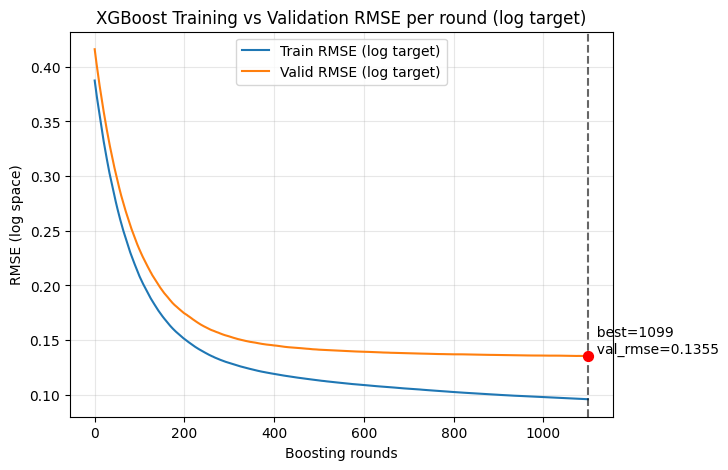

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.013333333333333334,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1100, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'best_round': 1099,
  'best_log_rmse': {'train': 0.09595167736574818,
   'valid': 0.13548536200623096},
  'orig_metrics_at_best_round': {'train': (19305.86247497708,
    11880.648089342556,
    6.787067774192658),
   'valid': (23935.

In [34]:
# method 2
# 'learning_rate': 0.013333333333333334，'n_estimators': 1100
best_params_from_linear = {
    'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.013333333333333334, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1100, 'reg_alpha': 0.4, 'reg_lambda': 8.0, 'subsample': 0.6
}
eval_with_log_target("./data/featured/Method2,selected/train_Method2_selected.csv", best_params_from_linear)

[LOG target] Hold-out — Metrics at BEST ROUND
  ▸ Best round (0-based) = 612  (train_log_rmse=0.0848, valid_log_rmse=0.1296)
  ▸ Note: xgboost old API detected (no eval_metric/early_stopping in fit); used fallback mode.
  ▸ Train RMSE=17542.0483 | MAE=10564.2747 | MAPE=5.88%
  ▸ Valid RMSE=26612.8198 | MAE=14773.8360 | MAPE=8.89%


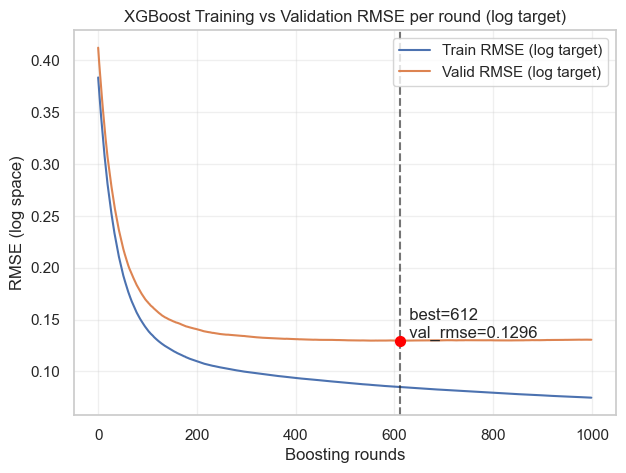

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'best_round': 612,
  'best_log_rmse': {'train': 0.08482254236974526,
   'valid': 0.12962509048455995},
  'orig_metrics_at_best_round': {'train': (17542.048281342348,
    10564.274665615818,
    5.879055150193635),
   'valid': (26612.819843909125, 14

In [177]:
# method 3
best_params_from_linear = {
    'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1000, 'reg_alpha': 0.39999999999999997, 'reg_lambda': 8.0, 'subsample': 0.7
}
eval_with_log_target("./data/featured/Method3,selected/train_selected.csv", best_params_from_linear)

In [ ]:
# Stage A + Stage B version
# --------- Utility Functions ---------
def _metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

def _plot_actual_vs_pred(y_true, y_pred, title):
    n = min(100, len(y_true))
    idx = np.random.choice(len(y_true), size=n, replace=False)
    plt.figure(figsize=(6,6))
    plt.scatter(y_true.iloc[idx], y_pred[idx], alpha=0.7, edgecolor='k')
    lo, hi = y_true.min(), y_true.max()
    plt.plot([lo, hi], [lo, hi], 'r--', lw=2)
    plt.title(title)
    plt.xlabel("Actual SalePrice"); plt.ylabel("Predicted SalePrice")
    plt.show()

def _plot_loss(evals_result, title="Training vs Validation RMSE (log target)"):
    """Plot the RMSE per round from XGBoost’s eval_set (note: RMSE is in log space)"""
    # evals_result_ keys are usually 'validation_0', 'validation_1'
    train_key = 'validation_0'
    valid_key = 'validation_1'
    metric = 'rmse'
    if (train_key not in evals_result) or (valid_key not in evals_result):
        print("Warning: evals_result_ missing expected keys; skip loss plot.")
        return
    tr = evals_result[train_key].get(metric, None)
    va = evals_result[valid_key].get(metric, None)
    if (tr is None) or (va is None):
        print("Warning: rmse metric not found in evals_result_; skip loss plot.")
        return

    plt.figure(figsize=(7,5))
    plt.plot(tr, label='Train RMSE (log target)')
    plt.plot(va, label='Valid RMSE (log target)')
    plt.xlabel('Boosting rounds')
    plt.ylabel('RMSE (log space)')
    plt.title(title)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# --------- Two-Stage Grid Search (LOG target, from scratch; 7:3 split; CV=5) ---------
def run_two_stage_grid_LOG(train_path, label='SalePrice', name='', random_state=42):
    print(f"\n=== Two-Stage GridSearch (LOG target) on {name} ===")

    # Read and split data
    df = pd.read_csv(train_path)
    X  = df.drop(columns=[label])
    y0 = df[label].astype(float)

    # Apply log1p to target (used for training/CV); convert back with expm1 for evaluation
    y = np.log1p(y0)

    # 7:3 hold-out split (used only for final reporting); GridSearch internally performs 5-fold CV
    X_tr, X_va, y0_tr, y0_va = train_test_split(X, y0, test_size=0.3, random_state=random_state)
    # To ensure consistency, split the log-transformed target using the same random_state
    _, _, y_tr, y_va = train_test_split(X, y, test_size=0.3, random_state=random_state)

    base = XGBRegressor(
        objective='reg:squarederror',
        random_state=random_state,
        n_jobs=-1
    )

    # ---------- Stage A: Broad grid (coarse search) ----------
    param_grid_A = {
        'max_depth':        [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'gamma':            [0.0, 0.1, 0.2],
        'learning_rate':    [0.02, 0.05, 0.1],
        'n_estimators':     [400, 800, 1200],
        'subsample':        [0.7, 0.85, 1.0],
        'colsample_bytree': [0.7, 0.85, 1.0],
        'reg_lambda':       [0.0, 2.0, 6.0],
        'reg_alpha':        [0.0, 0.2, 0.6],
    }
    gsA = GridSearchCV(
        estimator=base,
        param_grid=param_grid_A,
        scoring='neg_root_mean_squared_error',
        cv=5,                 # ← changed to 5-fold CV
        n_jobs=-1,
        verbose=1,
        refit=True
    )
    gsA.fit(X_tr, y_tr)
    bestA = gsA.best_params_
    print("[Stage A] Best params:", bestA)
    print("[Stage A] Best CV RMSE:", -gsA.best_score_)

    # ---------- Stage B: Fine-tuned grid around the best Stage-A parameters ----------
    md, mc, gm = bestA['max_depth'], bestA['min_child_weight'], bestA['gamma']
    lr, ne     = bestA['learning_rate'], bestA['n_estimators']
    ss, cs     = bestA['subsample'], bestA['colsample_bytree']
    rl, ra     = bestA['reg_lambda'], bestA['reg_alpha']

    param_grid_B = {
        'max_depth':        sorted(set([max(2, md-1), md, md+1])),
        'min_child_weight': sorted(set([max(1, mc-1), mc, mc+2])),
        'gamma':            sorted(set([max(0.0, gm-0.05), gm, gm+0.05])),
        'learning_rate':    sorted(set([max(0.01, lr/1.5), lr, min(0.2, lr*1.5)])),
        'n_estimators':     sorted(set([max(200, ne-200), ne, ne+300])),
        'subsample':        sorted(set([max(0.5, ss-0.1), ss, min(1.0, ss+0.1)])),
        'colsample_bytree': sorted(set([max(0.5, cs-0.1), cs, min(1.0, cs+0.1)])),
        'reg_lambda':       sorted(set([max(0.0, rl-2.0), rl, rl+2.0])),
        'reg_alpha':        sorted(set([max(0.0, ra-0.2), ra, ra+0.2])),
    }
    gsB = GridSearchCV(
        estimator=base,
        param_grid=param_grid_B,
        scoring='neg_root_mean_squared_error',
        cv=5,                 # ← changed to 5-fold CV
        n_jobs=-1,
        verbose=1,
        refit=True
    )
    gsB.fit(X_tr, y_tr)
    bestB = gsB.best_params_
    print("[Stage B] Best params:", bestB)
    print("[Stage B] Best CV RMSE:", -gsB.best_score_)

    # ---------- Retrain using Stage-B best parameters and record eval_set (for loss curve) ----------
    best_model = XGBRegressor(
        objective='reg:squarederror',
        random_state=random_state,
        n_jobs=-1,
        **bestB
    )
    # eval_set uses log-transformed targets (same as training) so evals_result_ RMSE is in log space
    best_model.fit(
        X_tr, y_tr,
        eval_set=[(X_tr, y_tr), (X_va, y_va)],
        eval_metric='rmse',
        verbose=False
    )
    evals_result = best_model.evals_result()

    # ---------- Final evaluation on the original monetary scale ----------
    pred_tr = np.expm1(best_model.predict(X_tr))
    pred_va = np.expm1(best_model.predict(X_va))

    rmse_tr, mae_tr, mape_tr = _metrics(y0_tr, pred_tr)
    rmse_va, mae_va, mape_va = _metrics(y0_va, pred_va)

    print(f"[{name} · LOG] Hold-out Performance (ORIGINAL SCALE, 70/30 split, CV=5)")
    print(f"  ▸ Train  RMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%")
    print(f"  ▸ Valid  RMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%")

    # Visualization: scatter plot on the original scale
    _plot_actual_vs_pred(
        y0_tr, pred_tr,
        f"{name} — Train [LOG] (Stage B)\nRMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%"
    )
    _plot_actual_vs_pred(
        y0_va, pred_va,
        f"{name} — Valid 30% [LOG] (Stage B)\nRMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%"
    )

    # Plot training loss curve (RMSE in log space)
    _plot_loss(
        evals_result,
        title=f"{name} — Training vs Validation RMSE per round (log target)"
    )

    return {
        "best_params": {"StageA": bestA, "StageB": bestB},
        "cv_best_rmse": {"StageA": -gsA.best_score_, "StageB": -gsB.best_score_},
        "holdout_metrics": {
            "train": (rmse_tr, mae_tr, mape_tr),
            "valid": (rmse_va, mae_va, mape_va),
        },
        "model": best_model,
        "evals_result": evals_result
    }


In [133]:
# 1) Method 3
res_m3_log = run_two_stage_grid_LOG("./data/featured/Method3,selected/train_selected.csv", name="Method3")


=== Two-Stage GridSearch (LOG target) on Method3 ===
Fitting 5 folds for each of 19683 candidates, totalling 98415 fits
[Stage A] Best params: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.02, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1200, 'reg_alpha': 0.6, 'reg_lambda': 6.0, 'subsample': 0.7}
[Stage A] Best CV RMSE: 0.1333582365046849
Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[Stage B] Best params: {'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1000, 'reg_alpha': 0.39999999999999997, 'reg_lambda': 8.0, 'subsample': 0.7}
[Stage B] Best CV RMSE: 0.13236962906385313


TypeError: fit() got an unexpected keyword argument 'eval_metric'

In [ ]:
# Cleaned version
res_cleaned_log = run_two_stage_grid_LOG("./data/cleaned/train.csv", name="Cleaned_all_features")



=== Two-Stage GridSearch (LOG target) on Cleaned_all_features ===
Fitting 5 folds for each of 19683 candidates, totalling 98415 fits
[Stage A] Best params: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.02, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1200, 'reg_alpha': 0.2, 'reg_lambda': 6.0, 'subsample': 0.7}
[Stage A] Best CV RMSE: 0.1327985486482119
Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[Stage B] Best params: {'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.013333333333333334, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1500, 'reg_alpha': 0.2, 'reg_lambda': 4.0, 'subsample': 0.6}
[Stage B] Best CV RMSE: 0.1309215469392709


TypeError: fit() got an unexpected keyword argument 'eval_metric'

In [ ]:
# Method 1
res_m1_log = run_two_stage_grid_LOG("./data/Method1,selected/train_filter.csv", name="Method1_Mutual_Info")



=== Two-Stage GridSearch (LOG target) on Method1_Mutual_Info ===
Fitting 5 folds for each of 19683 candidates, totalling 98415 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[Stage A] Best params: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.02, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 800, 'reg_alpha': 0.6, 'reg_lambda': 2.0, 'subsample': 0.7}
[Stage A] Best CV RMSE: 0.13546897674165242
Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[Stage B] Best params: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.02, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 600, 'reg_alpha': 0.39999999999999997, 'reg_lambda': 4.0, 'subsample': 0.6}
[Stage B] Best CV RMSE: 0.1339502780580935


TypeError: fit() got an unexpected keyword argument 'eval_metric'

In [ ]:
# Method 2 
res_m2_log = run_two_stage_grid_LOG("./data/Method2,selected/train_Method2_selected.csv", name="Method2_XGBoost_CV")


=== Two-Stage GridSearch (LOG target) on Method2_XGBoost_CV ===
Fitting 5 folds for each of 19683 candidates, totalling 98415 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[Stage A] Best params: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.02, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 800, 'reg_alpha': 0.2, 'reg_lambda': 6.0, 'subsample': 0.7}
[Stage A] Best CV RMSE: 0.13973244774573135
Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[Stage B] Best params: {'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.013333333333333334, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1100, 'reg_alpha': 0.4, 'reg_lambda': 8.0, 'subsample': 0.6}
[Stage B] Best CV RMSE: 0.13897028581131332


TypeError: fit() got an unexpected keyword argument 'eval_metric'

## for prediction

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# 1) Load data
train_df = pd.read_csv('./data/featured/Method3,selected/train_selected.csv')
test_df  = pd.read_csv('./data/featured/Method3,selected/test_selected.csv')

# 2) Training set
X_train = train_df.drop(columns=['SalePrice'])
y_train = np.log1p(train_df['SalePrice'])

# 3) Model (recommended to include eval_metric)
model = XGBRegressor(
    colsample_bytree=0.6,
    gamma=0.0,
    learning_rate=0.03,
    max_depth=3,
    min_child_weight=1,
    n_estimators=1000,
    reg_alpha=0.39999999999999997,
    reg_lambda=8.0,
    subsample=0.7,
    objective='reg:squarederror',
    eval_metric='rmse'
)
model.fit(X_train, y_train)
print("✅ Model training completed")

# 4) Prediction function: automatically handles “with/without early stopping” and aligns columns
def predict_safe(model, X, train_cols):
    # Use only columns from training to avoid passing extra ones (e.g., Id)
    X = X.loc[:, train_cols].copy()

    booster = model.get_booster()
    # If early stopping was used, there will be a best_iteration; otherwise, use all rounds
    end = getattr(booster, "best_iteration", None)
    if end is None:
        # Use all trees: num_boosted_rounds(); note the right endpoint is exclusive (no +1)
        end = booster.num_boosted_rounds()
    else:
        # When early stopping is used, best_iteration is the index of the last round,
        # so we predict up to end = best_iteration + 1
        end = end + 1

    preds_log = model.predict(X, iteration_range=(0, end))
    return np.expm1(preds_log)

# 5) Generate predictions
pred = predict_safe(model, test_df, train_cols=X_train.columns)

# 6) Export submission
sub = pd.DataFrame({
    "Id": test_df["Id"] if "Id" in test_df.columns else np.arange(1461, 1461 + len(test_df)),
    "SalePrice": pred
})
sub.to_csv("submission_xgb_log_method3.csv", index=False)
print("✅ Saved -> submission_xgb_log_method3.csv")
print(sub.head())


## for report

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# --- Metrics ---
def _metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-9, None))) * 100
    return rmse, mae, mape

# --- Output only scatter plots + metrics (no loss curve) ---
def eval_with_log_target_scatter(
    train_path,
    best_params,
    label='SalePrice',
    rs=42,
    test_size=0.3,
    early_stopping_rounds=100,
    fig_path=None,                    # e.g., "my_result.png"; pass None to skip saving
    title="XGBoost — Actual vs Predicted (log target)"
):
    # Read & split
    df = pd.read_csv(train_path)
    X = df.drop(columns=[label])
    y = df[label].astype(float)

    X_tr, X_va, y_tr_raw, y_va_raw = train_test_split(X, y, test_size=test_size, random_state=rs)
    y_tr = np.log1p(y_tr_raw)
    y_va = np.log1p(y_va_raw)

    model = XGBRegressor(objective='reg:squarederror', random_state=rs, n_jobs=-1, **best_params)

    # Training (prefer new API; fallback to old API if needed)
    try:
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_tr, y_tr), (X_va, y_va)],
            eval_metric='rmse',
            early_stopping_rounds=early_stopping_rounds,
            verbose=False
        )
    except TypeError:
        # Old API: does not support passing eval_metric / early_stopping_rounds in fit
        model.set_params(eval_metric='rmse')
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_tr, y_tr), (X_va, y_va)],
            verbose=False
        )

    # Find best iteration on the validation curve
    evals_result = model.evals_result()
    val_curve = evals_result['validation_1']['rmse']
    best_round = int(np.argmin(val_curve))  # 0-based

    # Prediction interface compatible with different versions
    def _predict_at_round(m, X, best_round):
        try:
            return m.predict(X, iteration_range=(0, best_round + 1))
        except TypeError:
            return m.predict(X, ntree_limit=best_round + 1)

    # Predict and convert back to original scale
    pred_tr = np.expm1(_predict_at_round(model, X_tr, best_round))
    pred_va = np.expm1(_predict_at_round(model, X_va, best_round))

    # Compute metrics (original scale)
    rmse_tr, mae_tr, mape_tr = _metrics(y_tr_raw, pred_tr)
    rmse_va, mae_va, mape_va = _metrics(y_va_raw, pred_va)

    print(f"[LOG target] Hold-out ({int((1-test_size)*100)}/{int(test_size*100)}) @ best_round={best_round}")
    print(f"  Train: RMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%")
    print(f"  Valid: RMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%")

    # --- Visualization (Actual vs Predicted) ---
    def _scatter(ax, y_true, y_pred, ttl):
        lo, hi = float(np.min(y_true)), float(np.max(y_true))
        ax.scatter(y_true, y_pred, s=12, alpha=0.55)
        ax.plot([lo, hi], [lo, hi], 'r--', lw=1.3)
        ax.set_xlabel("Actual")
        ax.set_ylabel("Predicted")
        ax.set_title(ttl)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    _scatter(axes[0], y_tr_raw, pred_tr, f"Train: RMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%")
    _scatter(axes[1], y_va_raw, pred_va, f"Valid: RMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%")
    fig.suptitle(title, y=1.02, fontsize=12)
    fig.tight_layout()

    if fig_path:
        plt.savefig(fig_path, dpi=180, bbox_inches="tight")
    plt.show()

    return {
        "best_round": best_round,
        "train": {"RMSE": rmse_tr, "MAE": mae_tr, "MAPE": mape_tr},
        "valid": {"RMSE": rmse_va, "MAE": mae_va, "MAPE": mape_va},
        "model": model
    }


[LOG target] Hold-out (70/30) @ best_round=1099
  Train: RMSE=19305.8625 | MAE=11880.6481 | MAPE=6.79%
  Valid: RMSE=23935.3104 | MAE=15595.6191 | MAPE=9.61%


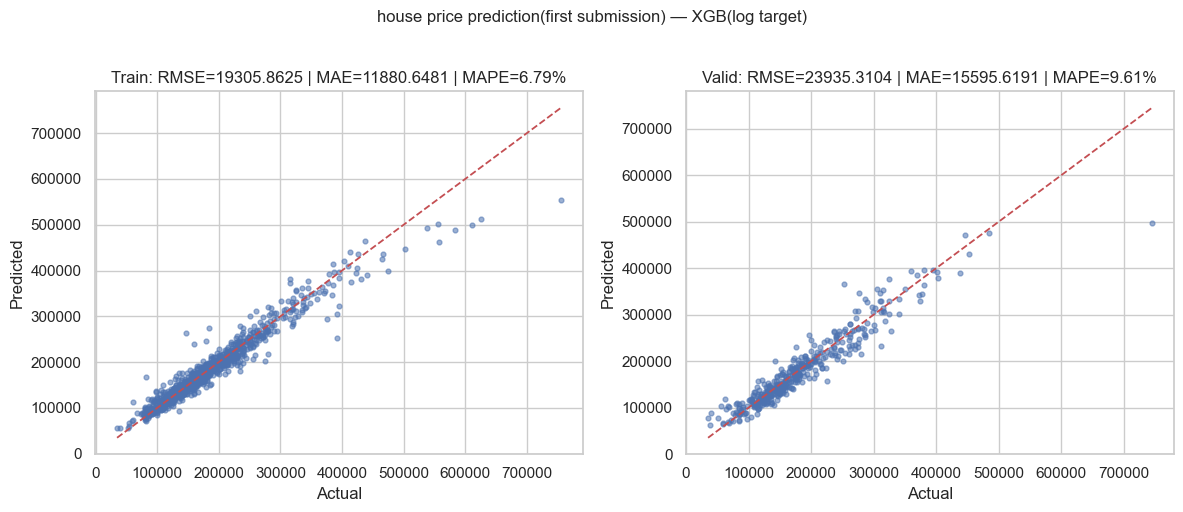

In [ ]:
# first submission
best_params = dict(
    colsample_bytree=0.6, gamma=0.0, learning_rate=0.013333333333333334, 
    max_depth=3, min_child_weight=1, n_estimators=1100, 
    reg_alpha=0.4, reg_lambda=8.0, subsample=0.6
)

res = eval_with_log_target_scatter(
    "./data/featured/Method2,selected/train_Method2_selected.csv",
    best_params,
    test_size=0.30,
    fig_path=None,         
    title="house price prediction(first submission) — XGB(log target)"
)


[LOG target] Hold-out (70/30) @ best_round=612
  Train: RMSE=17542.0483 | MAE=10564.2747 | MAPE=5.88%
  Valid: RMSE=26612.8198 | MAE=14773.8360 | MAPE=8.89%


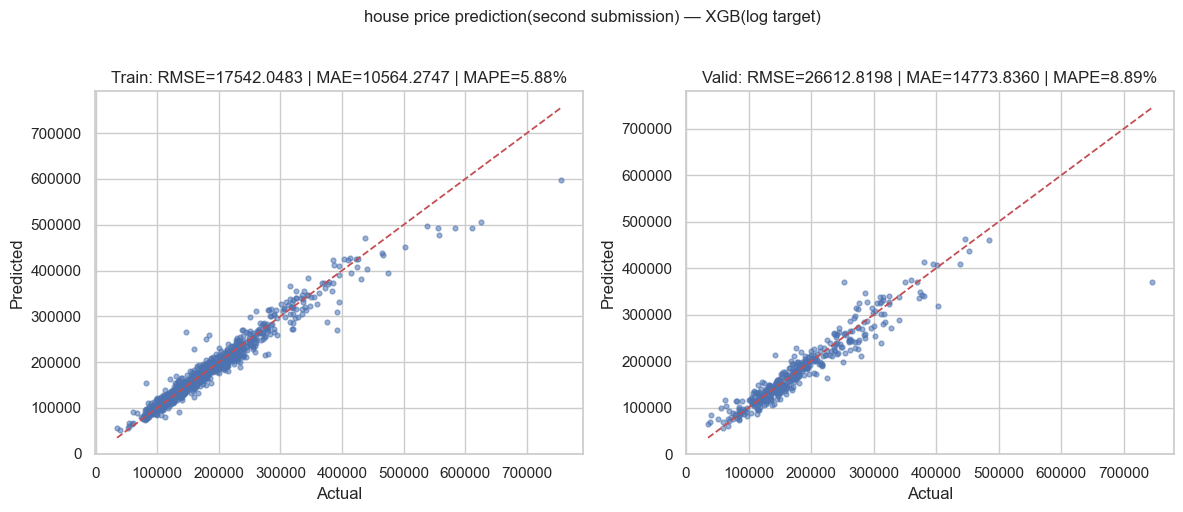

In [ ]:
# second submission
best_params = dict(
    colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, 
    max_depth=3, min_child_weight=1, n_estimators=1000, 
    reg_alpha=0.39999999999999997, reg_lambda=8.0, subsample=0.7
)

res = eval_with_log_target_scatter(
    "./data/featured/Method3,selected/train_selected.csv",
    best_params,
    test_size=0.30,
    fig_path=None,          
    title="house price prediction(second submission) — XGB(log target)"
)
